In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dfstd=pd.read_csv(r'C:\Users\User\Downloads\placements.csv')

In [4]:
dfstd

,score,exam_marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [5]:
dfstd['score'].skew()

-0.014529938929314918

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

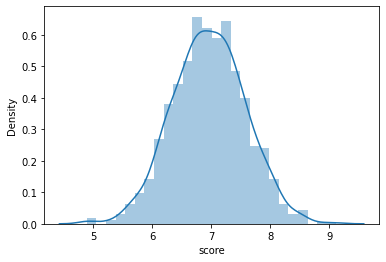

In [6]:
sns.distplot(dfstd['score'])

(array([ 3.,  0.,  1.,  1.,  3.,  5., 12.,  9., 17., 21., 36., 55., 49.,
        58., 72., 77., 72., 66., 79., 71., 69., 54., 47., 33., 28., 21.,
        19.,  7.,  4.,  6.,  3.,  0.,  1.,  0.,  1.]),
 array([4.89      , 5.01085714, 5.13171429, 5.25257143, 5.37342857,
        5.49428571, 5.61514286, 5.736     , 5.85685714, 5.97771429,
        6.09857143, 6.21942857, 6.34028571, 6.46114286, 6.582     ,
        6.70285714, 6.82371429, 6.94457143, 7.06542857, 7.18628571,
        7.30714286, 7.428     , 7.54885714, 7.66971429, 7.79057143,
        7.91142857, 8.03228571, 8.15314286, 8.274     , 8.39485714,
        8.51571429, 8.63657143, 8.75742857, 8.87828571, 8.99914286,
        9.12      ]),
 <BarContainer object of 35 artists>)

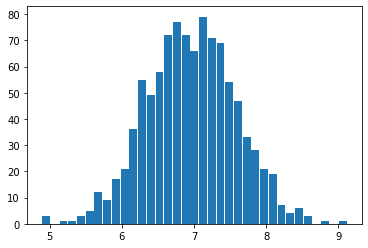

In [13]:
plt.hist(dfstd['score'],bins=35,rwidth=0.9)

In [14]:
m=dfstd['score'].mean()

In [15]:
m

6.96124000000001

In [16]:
sd=dfstd['score'].std()

In [17]:
sd

0.6158978751323894

In [18]:
dfstd['Zscore']=(dfstd['score']-m)/sd

In [19]:
dfstd['Zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: Zscore, Length: 1000, dtype: float64

In [20]:
dfstd

,score,exam_marks,selected,Zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
998,8.62,46,1,2.693239


In [23]:
dfstd[dfstd['Zscore']<-3]

,score,exam_marks,selected,Zscore
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [24]:
dfstd[dfstd['Zscore']>3]

,score,exam_marks,selected,Zscore
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [25]:
dfstd[(dfstd['Zscore']<-3)|(dfstd['Zscore']>3)]

,score,exam_marks,selected,Zscore
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


## Trimming the outliers

In [28]:
dfstd1=dfstd[(dfstd['Zscore']>-3)&(dfstd['Zscore']<3)]

In [29]:
dfstd1

,score,exam_marks,selected,Zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


## Capping the outliers
Don't use capping mechanism while using Z-score method, bcoz it will affect only on Z-score column but not on score column.

In [30]:
dfstd[(dfstd['Zscore']<-3)|(dfstd['Zscore']>3)]

,score,exam_marks,selected,Zscore
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [31]:
dfstd['Zscore']=np.where(dfstd['Zscore']<-3,-3,np.where(dfstd['Zscore']>3,3,dfstd['Zscore']))

In [32]:
dfstd

,score,exam_marks,selected,Zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
995,8.87,44,1,3.000000
996,9.12,65,1,3.000000
997,4.89,34,0,-3.000000
998,8.62,46,1,2.693239


In [33]:
dfstd[(dfstd['Zscore']<-3)|(dfstd['Zscore']>3)]

,score,exam_marks,selected,Zscore
